# A Second Empirical Exploration of Machine Learning Concepts

## Linear regression predictors
Let define the class of affine function $$L_d = \{h_{w,b}: w\in\mathbb{R}^d, b\in\mathbb{R}\}$$,
where $$h_{w,b}(x)=w\cdot x+b = \sum_{j=1}^d w_jx_j + b.$$
It may be more convenient to incorporate $b$, called the bias, into $w$ as an extra coordinate and add an extra coordinate with a value of 1 to all $x \in {\cal X}$. Let $w'=(b,w_1,\ldots,w_d)\in \mathbb{R}^{d+1}$ and $x'=(1,x_1,\dots,x_d)\in\mathbb{R}^{d+1}$. We can write, $$h_{w,b}(x)=w\cdot x+b=w'\cdot x' .$$
The hypothesis class of *linear regression predictors* is the set of linear functions ${\cal H}_{lin}=L_d$. *Least squares* is the algorithm that solves the ERM problem for the hypothesis class of linear regression predictors with respect to the squared loss. The ERM problem with respect to this class, given a training set S is to find:
$$\textrm{argmin}_w L_S(h_w)=\textrm{argmin}_w \frac{1}{m}\sum_{i=1}^m(w'\cdot x_i' - y_i)^2$$

Some learning tasks call for nonlinear predictors, such as polynomial predictors. Take, for instance, a one dimensional polynomial function of degree n, that is, $$p(x)=a_0+a_1 x+a_2 x^2+\ldots +a_n x^n$$. One way to learn this class is by reduction to the problem of linear regression. To translate a polynomial regression
problem to a linear regression problem, we define the mapping $\psi:\mathbb{R} \rightarrow \mathbb{R}^{n+1}$
such that $\psi(x) = (1, x, x^2, \ldots, x^n)$. Then we have that $$p(\psi(x)) = a_0 + a_1 x + a_2 x^2 + \ldots + a_n x^n = a\cdot\psi(x)$$ and we can find the optimal vector of coefficients a by using the Least Squares algorithm. 

> ### Questions:
> 1. Use the [LinearRegression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) module from sklearn to learn a linear regression predictor for the simpledata set.
> 1. Use the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) and [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) modules in sklearn to learn a polynomial predictor for the simpledaat set.
> 1. Find the best regressor to solve the task in (https://archive.ics.uci.edu/ml/datasets/Abalone)

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
train = pd.read_csv("./simpledata_train.csv")
test = pd.read_csv("./simpledata_test.csv")

In [20]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [49]:
x_train = train["x"].values[:,np.newaxis] # column matrix instead of line vector
y_train = train["y"]

x_test = test["x"].values[:,np.newaxis] # column matrix instead of line vector
y_test = test["y"]

In [4]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
y_pred = regr.predict(x_test)

In [6]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [3.12988725]
Mean squared error: 22.36
Variance score: 0.75


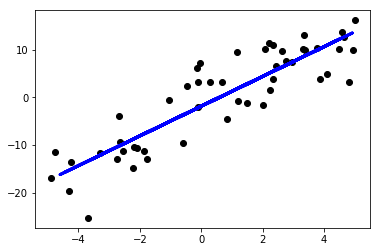

In [7]:
plt.scatter(x_train, y_train,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.show()

#print(x_test)

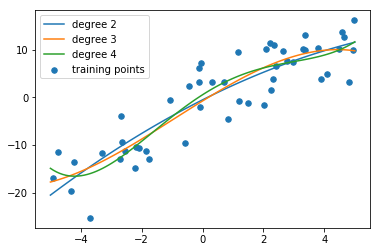

In [161]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
train = pd.read_csv("./simpledata_train.csv")
test = pd.read_csv("./simpledata_test.csv")

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


from sklearn import linear_model
reg = linear_model.LinearRegression()

# generate points and keep a subset of them
x_train = train["x"].values[:,np.newaxis] # column matrix instead of line vector
y_train = train["y"]

#print((x_train))

x_test = test["x"].values[:,np.newaxis] # column matrix instead of line vector
y_test = test["y"]

# create matrix versions of these arrays
X = x_train[:, np.newaxis]
x_plot = np.linspace(-5, 5, 100)
X_plot = x_plot[:, np.newaxis]

plt.scatter(x_train, y_train, s=30, marker='o', label="training points")

for degree in range(2,5):
    model = make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    model.fit(x_train, y_train)
  #  print((x_train))
    X_plot = x_plot[:, np.newaxis]
    y_plot = model.predict(X_plot)
 #   y_pred=model.predict(X_plot)
    plt.plot(X_plot, y_plot,label="degree %d" % degree)

plt.legend(loc='best')


In [1]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


from sklearn import linear_model
reg = linear_model.LinearRegression()

f=open("abalone.data", 'r')

In [2]:
lines = f.read().splitlines()

In [17]:
x_train=[]
y_train=[]
for line in lines:
    line=np.array(line.split(','))

    if line[0] == 'M':

        line[0]=1.

    elif line[0] == 'F':
        line[0]=3.

    elif line[0] == 'I':
        line[0]=2.
    x_train.append(line[:8])
    y_train.append(line[-1])

x_train=np.array(x_train).astype(np.float64)
y_train=np.array(y_train).astype(np.float64)
print(len(x_train))

x_train = np.delete(x_train,100, axis = 0)

print(len(x_train))

#

# for degree in range(3,7):
#     model = make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
#     model.fit(x_train, y_train)
#     y_plot = model.predict(x_train[4:9])
#     print(y_plot)

4177
4176


In [167]:
a=[1,2]
b=[]
c=np.append(a,b)
print(c)

[1. 2.]


In [141]:
a = np.array([[1, 2, 3],[4,5,6]])
#a = a[:, np.newaxis]
a=np.vstack(([a],[a]))
#a=np.stack((a,a))
print(a)

[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]
